<a href="https://colab.research.google.com/github/VaggelisApostolou/auth-dws-ml-2025/blob/main/ML_Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import random
import math
import cv2

# **Ερωτήματα**

## *Ερώτημα 1*

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


## *Ερώτημα 2*

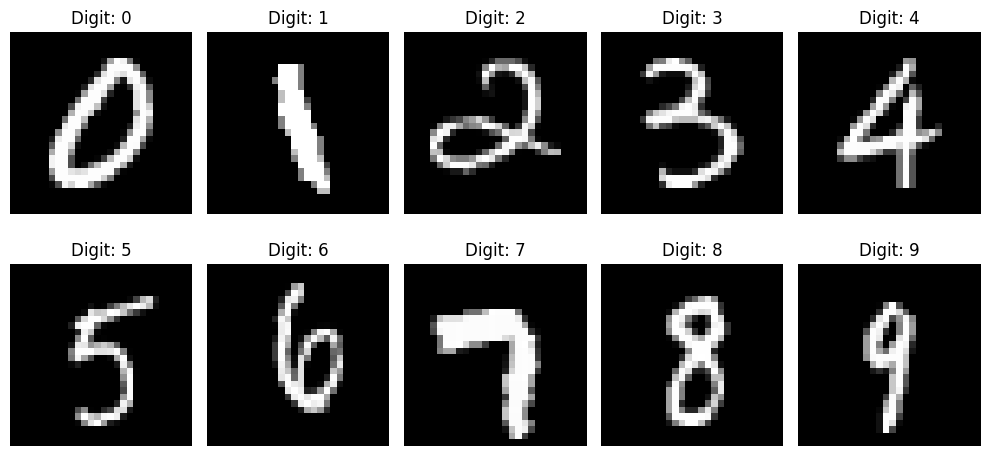

In [3]:
plt.figure(figsize=(10, 5))
for digit in range(10):
    indices = np.where(y_train == digit)[0]
    random_idx = random.choice(indices)
    plt.subplot(2, 5, digit + 1)
    plt.imshow(x_train[random_idx], cmap='gray')
    plt.title(f"Digit: {digit}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## *Ερώτημα 3*

In [4]:
print(f"Μέγεθος κάθε εικόνας: {x_train[0].shape}")
print(f"Συνολικά pixel ανά εικόνα: {x_train[0].shape[0] * x_train[0].shape[1]}")

Μέγεθος κάθε εικόνας: (28, 28)
Συνολικά pixel ανά εικόνα: 784


Κάθε εικόνα αποτελείται από 28x28 pixels, δηλαδή συνολικά από 784 pixels. Κάθε pixel δεν είναι εξίσου σημαντικό, διότι τα ψηφία είναι κεντραρισμένα και τα pixels στα πλαϊνά είναι συνήθως μαύρα.

## *Ερώτημα 4*

In [5]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print(x_train_flat.shape)
print(x_test_flat.shape)

(60000, 784)
(10000, 784)


## *Ερώτημα 5*

k=5: Train Acc=0.9819, Test Acc=0.9688
k=15: Train Acc=0.9710, Test Acc=0.9633
k=51: Train Acc=0.9532, Test Acc=0.9533
k=244: Train Acc=0.9211, Test Acc=0.9241


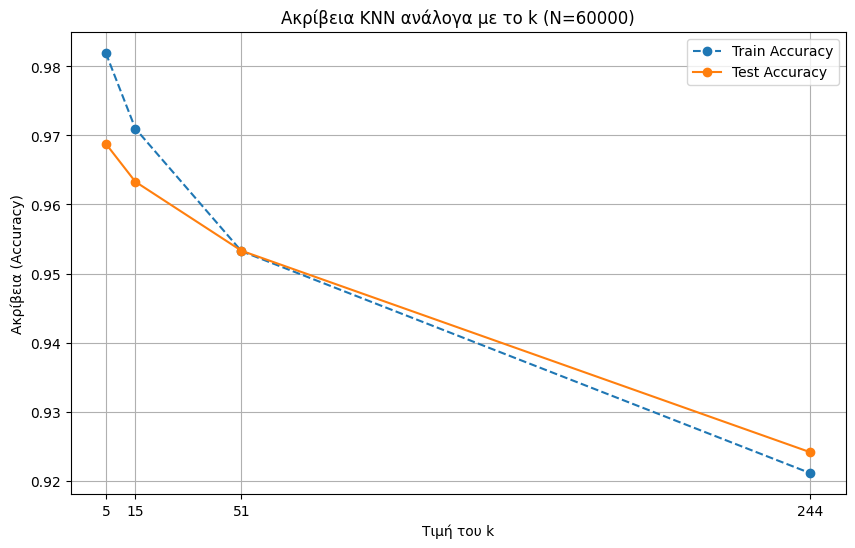

In [6]:
subset_size = 60000
x_train_sub = x_train_flat[:subset_size]
y_train_sub = y_train[:subset_size]
N = len(y_train_sub)
k_sqrt = int(math.sqrt(N))
k_values = sorted(list(set([5, 15, 51, k_sqrt])))
train_accuracies = []
test_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_sub, y_train_sub)
    y_pred_train = knn.predict(x_train_sub)
    acc_train = accuracy_score(y_train_sub, y_pred_train)
    train_accuracies.append(acc_train)
    y_pred_test = knn.predict(x_test_flat)
    acc_test = accuracy_score(y_test, y_pred_test)
    test_accuracies.append(acc_test)
    print(f"k={k}: Train Acc={acc_train:.4f}, Test Acc={acc_test:.4f}")
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Train Accuracy', linestyle='--')
plt.plot(k_values, test_accuracies, marker='o', label='Test Accuracy')
plt.title(f'Ακρίβεια KNN ανάλογα με το k (N={N})')
plt.xlabel('Τιμή του k')
plt.ylabel('Ακρίβεια (Accuracy)')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

## *Ερώτημα 6*

k=5 (Normalized): Test Acc=0.9688
k=15 (Normalized): Test Acc=0.9633
k=51 (Normalized): Test Acc=0.9533
k=244 (Normalized): Test Acc=0.9241


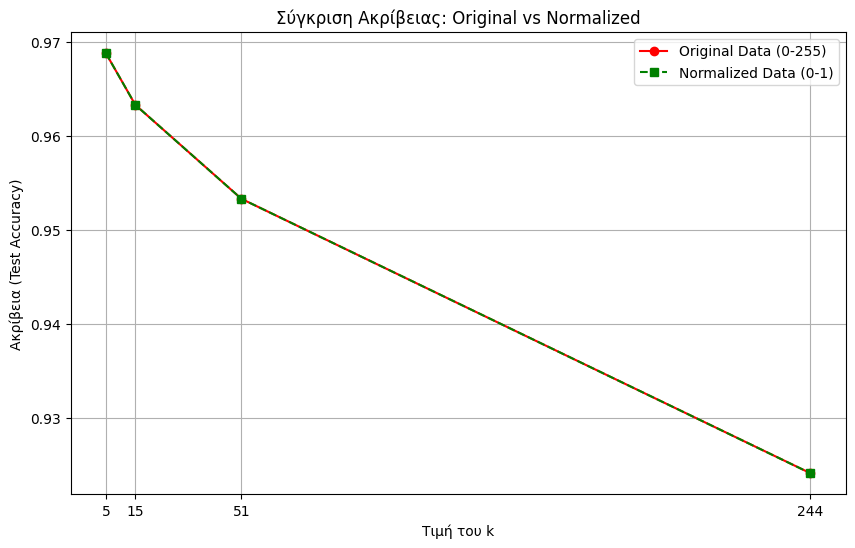

In [7]:
x_train_norm = x_train_flat / 255.0
x_test_norm = x_test_flat / 255.0
x_train_sub_norm = x_train_norm[:subset_size]
test_accuracies_norm = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_sub_norm, y_train_sub)
    y_pred_test = knn.predict(x_test_norm)
    acc_test = accuracy_score(y_test, y_pred_test)
    test_accuracies_norm.append(acc_test)

    print(f"k={k} (Normalized): Test Acc={acc_test:.4f}")
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_accuracies, marker='o', label='Original Data (0-255)', color='red')
plt.plot(k_values, test_accuracies_norm, marker='s', label='Normalized Data (0-1)', color='green', linestyle='--')
plt.title('Σύγκριση Ακρίβειας: Original vs Normalized')
plt.xlabel('Τιμή του k')
plt.ylabel('Ακρίβεια (Test Accuracy)')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

## *Ερώτημα 7*

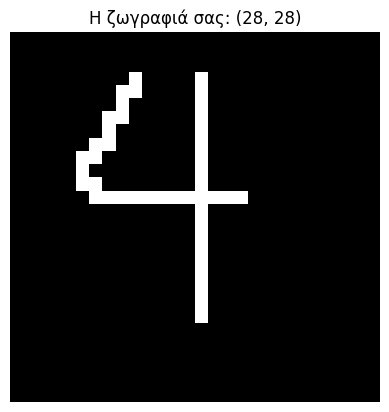

Πρόβλεψη του KNN: 1


In [9]:
image = '4.png'
img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f"Η ζωγραφιά σας: {img.shape}")
plt.axis('off')
plt.show()
flat = img.reshape(1, -1)
normalized = flat.astype('float32') / 255.0
prediction = knn.predict(normalized)
print(f"Πρόβλεψη του KNN: {prediction[0]}")